In [6]:
import argparse
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np

from isc.io import read_ground_truth, read_predictions
from isc.metrics import evaluate, Metrics, print_metrics

In [31]:
precision = []
recall = []
racall_10 = []
for i in range(8, 26):
    predictions = read_predictions(f"./data/glv2_t/disc/{i}/matrix_no_norm.csv")
    gts = read_ground_truth('./data/glv2_t/ground_truth.csv')
    metrics = evaluate(gts, predictions)
    precision.append(metrics.average_precision)
    recall.append(metrics.recall_at_rank1)
    racall_10.append(metrics.recall_at_rank10)
    if metrics.recall_at_p90 is None:
        print(f"| {str(i).zfill(2)}            | {metrics.average_precision:.5f}               | -                 | -                   | {metrics.recall_at_rank1:.5f}              | {metrics.recall_at_rank10:.5f}               |")
    else:
        print(f"| {str(i).zfill(2)}            | {metrics.average_precision:.5f}               | {metrics.recall_at_p90:.5f}           | {metrics.threshold_at_p90:g}             | {metrics.recall_at_rank1:.5f}              | {metrics.recall_at_rank10:.5f}               |")

| 08            | 0.02860               | 0.00654           | 0.965307             | 0.01797              | 0.06447               |
| 09            | 0.02612               | 0.00634           | 0.962621             | 0.01632              | 0.05932               |
| 10            | 0.02284               | 0.00680           | 0.964586             | 0.01473              | 0.05278               |
| 11            | 0.02911               | 0.00733           | 0.943614             | 0.01711              | 0.06170               |
| 12            | 0.03112               | 0.00793           | 0.94586             | 0.01731              | 0.06236               |
| 13            | 0.03176               | 0.00859           | 0.935513             | 0.01770              | 0.06236               |


FileNotFoundError: [Errno 2] No such file or directory: './data/glv2_t/disc/14/matrix_no_norm.csv'

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

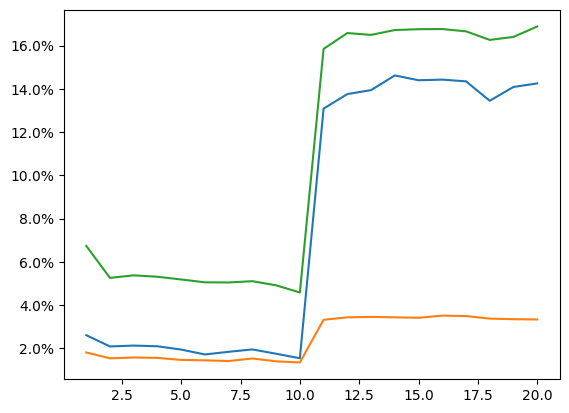

In [26]:
x = np.linspace(1, 20, 20)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.plot(x, precision)
plt.plot(x, recall)
plt.plot(x, racall_10)
plt.savefig("./fig.png")

In [28]:
plt.savefig("./fig.png")

<Figure size 640x480 with 0 Axes>